In [1]:
import matplotlib.pyplot as plt
import RET
import numpy as np

# plotting parameters
plt.rcParams["font.family"] = "serif"
plt.rcParams['lines.linewidth'] = 4.0
save_figures = False

[0.53051436 1.94375597]


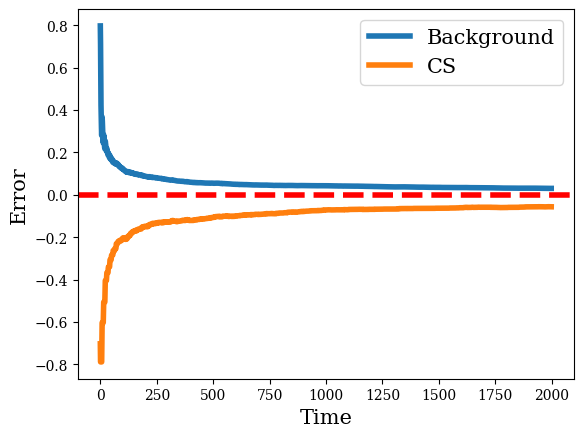

In [2]:
# Set up an events generator for a Pavlovian conditioning protocol with Poisson distributions
ISI = 2  # 2 seconds of stimulus
ITI = 5  # 3 seconds of intertrial interval
lambda_vector = [0.5, 2.0]  # Example lambda values
events_poisson = RET.generate_events_function(ISI, ITI, lambda_vector)

# Generate learning curve (estimation error as a function of time)
model = RET.model_constructor()
steps = np.arange(0, 2000, 1)
err = np.zeros((len(steps)-1,2))
for i in range(len(steps)-1):
    model.run(events_poisson, steps[i], steps[i+1])
    err[i,:] = model.lambda_hat - lambda_vector
    
# Print final estimate
print(model.lambda_hat)
    
# Plot results
plt.plot(err)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.ylabel('Error', fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.legend(['Background','CS'], fontsize=15)

if save_figures:
    plt.savefig("learning_curve_poisson.pdf", format="pdf", bbox_inches="tight")

2, 2, 2.0300598241844066
2, 6, 2.5436244640229466
3, 2, 2.0346596092200127
3, 6, 2.5485394558365124
4, 2, 2.0369717371497043
4, 6, 2.551006233496995
5, 2, 2.038362962051038
5, 6, 2.552489286567001
6, 2, 2.0392920980532354
6, 6, 2.5534792367788173


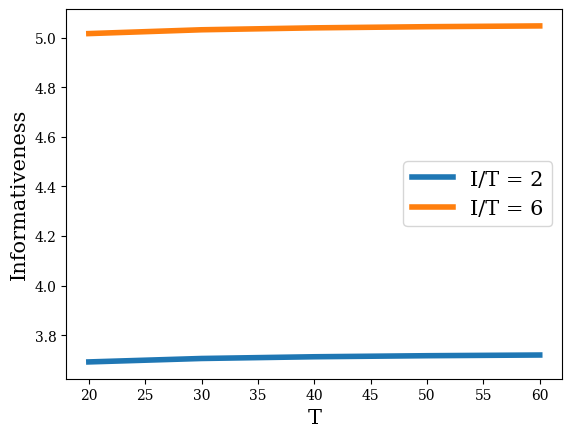

In [3]:
# Test timescale invariance by running Pavlovian delay conditioning with different ISIs and a fixed ITI/ISI ratio

ISI = 10              # base ISI
K = [2,3,4,5,6]       # ISI and ITI multipliers
ratios = [2, 6]       # ITI/ISI ratios
H = np.zeros((len(K),len(ratios)))

for i, k in enumerate(K):
    for j, ratio in enumerate(ratios):
        events_delay = RET.generate_events_function(ISI*k,ISI*k*ratio)
        model = RET.model_constructor()
        model.run(events_delay, 0, 240*k)
        H[i,j], V = model.informativeness([1,1])

# Plot results
plt.plot(np.array(K)*ISI,H)
plt.ylabel('Informativeness', fontsize=15)
plt.xlabel('T', fontsize=15)
plt.legend(['I/T = 2','I/T = 6'], fontsize=15)

if save_figures:
    plt.savefig("timescale_invariance.pdf", format="pdf", bbox_inches="tight")